In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = open('London/station_final.pkl','rb')
station_data = pickle.load(file)
file.close()

In [17]:
station_data["BL0"].iloc[0:5, 0:24]

station_id  PM25_Concentration  PM10_Concentration  \
time                                                                     
2017-01-01 00:00:00        BL0                30.8                31.6   
2017-01-01 01:00:00        BL0                22.9                34.6   
2017-01-01 02:00:00        BL0                18.4                25.2   
2017-01-01 03:00:00        BL0                19.5                24.0   
2017-01-01 04:00:00        BL0                22.1                26.7   

                     NO2_Concentration  time_year  time_month  time_week  \
time                                                                       
2017-01-01 00:00:00               10.8     2017.0         1.0        6.0   
2017-01-01 01:00:00               17.3     2017.0         1.0        6.0   
2017-01-01 02:00:00               14.2     2017.0         1.0        6.0   
2017-01-01 03:00:00               14.8     2017.0         1.0        6.0   
2017-01-01 04:00:00               16.7     2017.0         1.0        6.0   

                     time_day  time_hour  temperature  ...  holiday  \
time                                                   ...            
2017-01-01 00:00:00       1.0        0.0         5.80  ...        2   
2017-01-01 01:00:00       1.0        1.0         5.84  ...        2   
2017-01-01 02:00:00       1.0        2.0         5.89  ...        2   
2017-01-01 03:00:00       1.0        3.0         5.93  ...        2   
2017-01-01 04:00:00       1.0        4.0         6.12  ...        2   

                     station_index  pressure_temperature  \
time                                                       
2017-01-01 00:00:00              6             5915.5940   
2017-01-01 01:00:00              6             5949.3832   
2017-01-01 02:00:00              6             5993.2517   
2017-01-01 03:00:00              6             6026.8369   
2017-01-01 04:00:00              6             6214.1256   

                     temperature_humidity    PM   PM25_10  mean_PM25  \
time                                                                   
2017-01-01 00:00:00              0.063464  62.4  0.974375        0.0   
2017-01-01 01:00:00              0.064911  57.5  0.661658        0.0   
2017-01-01 02:00:00              0.066516  43.6  0.729869        0.0   
2017-01-01 03:00:00              0.068059  43.5  0.812162        0.0   
2017-01-01 04:00:00              0.069903  48.8  0.827405        0.0   

                     mean_PM10  mean_NO2  mean_temperature  
time                                                        
2017-01-01 00:00:00        0.0       0.0               0.0  
2017-01-01 01:00:00        0.0       0.0               0.0  
2017-01-01 02:00:00        0.0       0.0               0.0  
2017-01-01 03:00:00        0.0       0.0               0.0  
2017-01-01 04:00:00        0.0       0.0               0.0  

[5 rows x 24 columns]

In [10]:
pm25_all = []
pm10_all = []
no2_all = []
p_t_all = []
t_h_all = []

In [11]:
for x in station_data:
    for index, row in station_data[x].iterrows():
            pm25_all.append(abs(row["PM25_Concentration"]))
            pm10_all.append(abs(row["PM10_Concentration"]))
            no2_all.append(abs(row["NO2_Concentration"]))
            p_t_all.append(row["pressure_temperature"])
            t_h_all.append(row["temperature_humidity"])


In [12]:
PT_TH_pollu_rela = pd.DataFrame({
    'Pressure_Temperature': p_t_all,
    'Temperature_Humidity': t_h_all,
    'PM2.5': pm25_all,
    'PM10': pm10_all,
    'NO2': no2_all
})
PT_TH_pollu_corr = PT_TH_pollu_rela.corr()

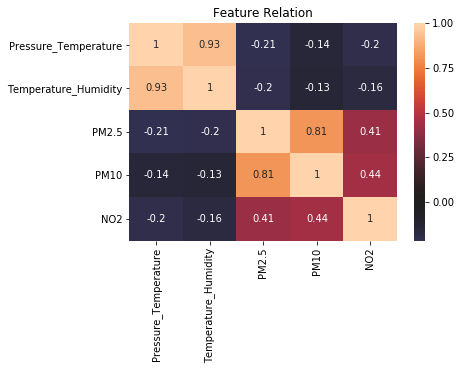

In [13]:
sns.heatmap(PT_TH_pollu_corr, center=0, annot=True)
plt.title("Feature Relation")
plt.show()

(array([1.15155e+05, 8.54130e+04, 2.24580e+04, 4.47200e+03, 1.11700e+03,
        1.89000e+02, 2.50000e+01, 4.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([  0.  ,  33.61,  67.22, 100.83, 134.44, 168.05, 201.66, 235.27,
        268.88, 302.49, 336.1 ]),
 <a list of 10 Patch objects>)

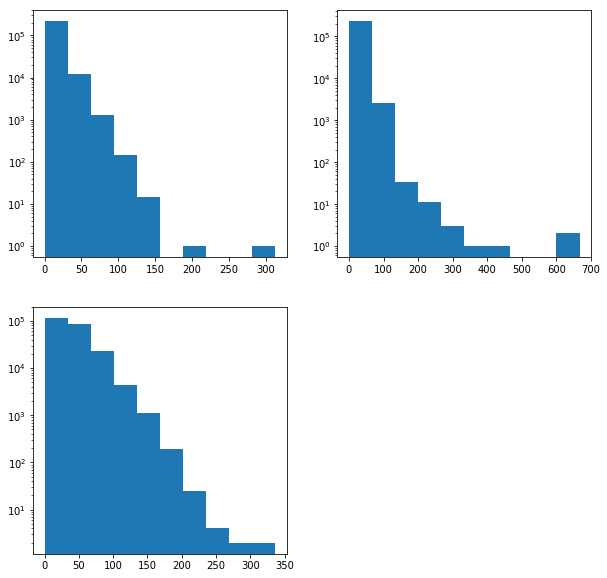

In [65]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.hist(pm25_all,  bins=10, log=True)

ax2 = fig.add_subplot(222)
ax2.hist(pm10_all, bins=10, log=True, stacked=True)

ax3 = fig.add_subplot(223)
ax3.hist(no2_all, bins=10, log=True, stacked=True)


In [66]:

# wind direct changing frequency

#while wind direct change 15 degree, we consider the direct have changed.
change_lim = 15
wind_speed_all = []
wind_direct_all = []

In [67]:
for x in station_data:
    for index, row in station_data[x].iterrows():
        wind_speed_all.append(row["wind_speed"])
        wind_direct_all.append(row["wind_direction"])
        

In [68]:
wind_dir_change_freq = []
